In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings     

In [2]:
train=pd.read_csv('train.csv')

In [4]:
train.shape

(614, 13)

In [6]:
test=pd.read_csv('test_original.csv')

In [7]:
test.shape

(367, 13)

In [8]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
test.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [10]:
train[train['Credit_History'].isnull()]['Loan_Status'].value_counts()

Y    37
N    13
Name: Loan_Status, dtype: int64

In [11]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)


In [12]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
#as 85% have loan amount term to be 360 

In [13]:
# as we saw that loan amount have outliers and meadian is not susceptible to outliers
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [15]:
 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 

In [17]:
test.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64

In [18]:
train['Credit_History'].fillna('Unknown', inplace=True)
test['Credit_History'].fillna('Unknown', inplace=True)

## credit history

In [19]:
train['Credit_History'].value_counts()

1.0        475
0.0         89
Unknown     50
Name: Credit_History, dtype: int64

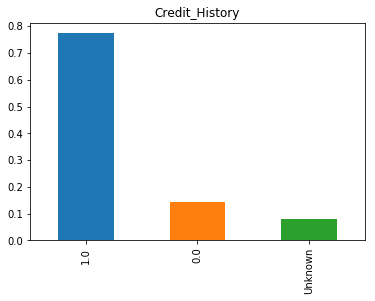

In [20]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 

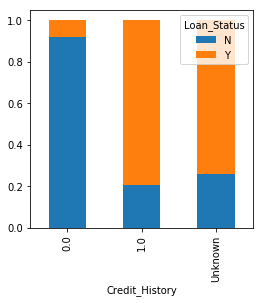

In [21]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 

In [22]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### dependents 

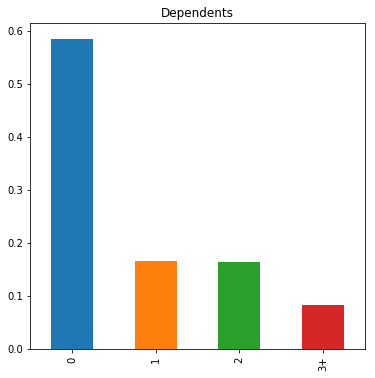

In [24]:
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(6,6), title= 'Dependents') 

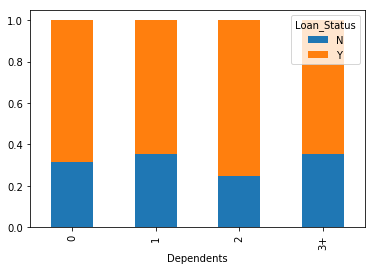

In [25]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)


In [40]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'single'],
      dtype='object')

In [41]:
train.drop('single',axis=1,inplace=True)

In [42]:
train.shape

(614, 13)

In [43]:
train['Dependents'].replace('3+', 3,inplace=True) 

In [47]:
train['single']=0
train.loc[(train['Dependents'] == 1)  , 'Single'] = 1
train.loc[(train['Dependents'] == 2)  , 'Single'] = 1
train.loc[(train['Dependents'] == 3)  , 'Single'] = 1

In [48]:
train['single'].value_counts()

0    614
Name: single, dtype: int64

In [49]:
train.drop('single',axis=1,inplace=True)

In [50]:
train.drop('Single',axis=1,inplace=True)

In [36]:
train['single'].value_counts()

1    563
0     51
Name: single, dtype: int64

In [51]:
train.shape

(614, 13)

In [55]:
train['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [53]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [54]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [57]:
train['Family']= 0
train.loc[(train['Dependents'] == 1) , 'Family'] = 1
train.loc[(train['Dependents'] == 2) , 'Family'] = 1
train.loc[(train['Dependents'] == 3) , 'Family'] = 1

In [58]:
train['Family'].value_counts()

0    563
1     51
Name: Family, dtype: int64

In [59]:
train.drop('Family',axis=1,inplace=True)

In [60]:
train['Family']= 0
train.loc[(train['Dependents'] == 1) , 'Family'] = 1
train.loc[(train['Dependents'] == 2) , 'Family'] = 1
train.loc[(train['Dependents'] == 3) , 'Family'] = 1

In [61]:
train['Family'].value_counts()

0    563
1     51
Name: Family, dtype: int64

In [62]:
train['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [63]:
train.drop('Family',axis=1,inplace=True)

In [64]:
train['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [67]:
train['timePeriod']= 0
train.loc[(train['Loan_Amount_Term'] == 360.0) , 'timePeriod'] = 1


In [68]:
train['timePeriod'].value_counts()

1    526
0     88
Name: timePeriod, dtype: int64

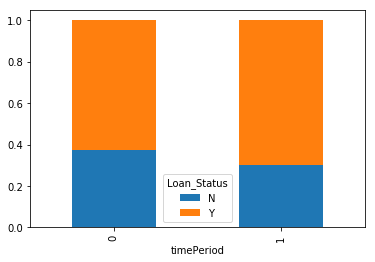

In [69]:
timeperiod=pd.crosstab(train['timePeriod'],train['Loan_Status'])
timeperiod.div(timeperiod.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)


In [70]:
time=pd.crosstab(train['Loan_Amount_Term'],train['Loan_Status'])
time.div(time.sum(1).astype(float), axis=0)

Loan_Status,N,Y
Loan_Amount_Term,,
12.0,0.000000,1.000000
36.0,1.000000,0.000000
60.0,0.000000,1.000000
84.0,0.250000,0.750000
120.0,0.000000,1.000000
180.0,0.340909,0.659091
240.0,0.250000,0.750000
300.0,0.384615,0.615385
360.0,0.302281,0.697719


In [71]:
train['LoanTerm']= 'low'
train.loc[(train['Loan_Amount_Term'] == 480.0) , 'LoanTerm'] = 'high'
train.loc[(train['Loan_Amount_Term'] == 180.0) , 'LoanTerm'] = 'med'
train.loc[(train['Loan_Amount_Term'] == 240.0) , 'LoanTerm'] = 'med'
train.loc[(train['Loan_Amount_Term'] == 300.0) , 'LoanTerm'] = 'med'
train.loc[(train['Loan_Amount_Term'] == 360.0) , 'LoanTerm'] = 'med'




In [72]:
train['LoanTerm'].value_counts()

med     587
high     15
low      12
Name: LoanTerm, dtype: int64

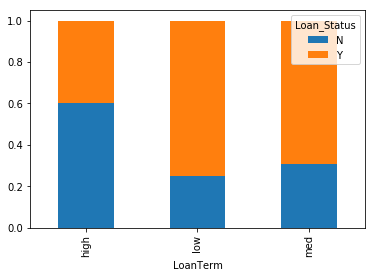

In [73]:
loanterm=pd.crosstab(train['LoanTerm'],train['Loan_Status'])
loanterm.div(loanterm.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)


In [74]:
test['LoanTerm']= 'low'
test.loc[(test['Loan_Amount_Term'] == 480.0) , 'LoanTerm'] = 'high'
test.loc[(test['Loan_Amount_Term'] == 180.0) , 'LoanTerm'] = 'med'
test.loc[(test['Loan_Amount_Term'] == 240.0) , 'LoanTerm'] = 'med'
test.loc[(test['Loan_Amount_Term'] == 300.0) , 'LoanTerm'] = 'med'
test.loc[(test['Loan_Amount_Term'] == 360.0) , 'LoanTerm'] = 'med'




## income

In [75]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


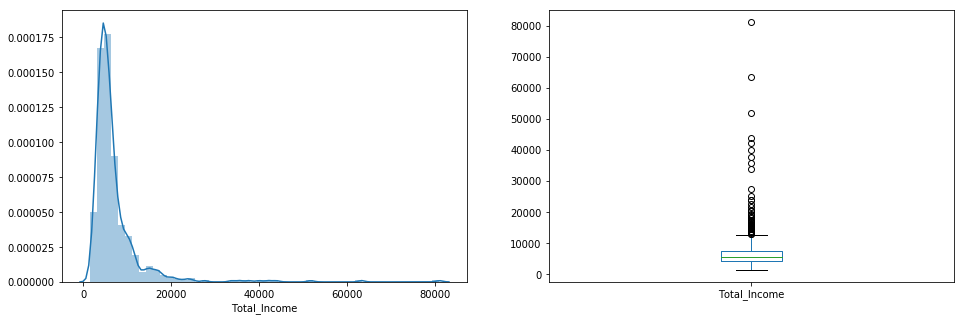

In [76]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['Total_Income']); 
plt.subplot(122)
train['Total_Income'].plot.box(figsize=(16,5)) 
plt.show()

In [77]:
train['Total_Income'].min()

1442.0

In [78]:
train['log_income']=np.log(train['Total_Income'])

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


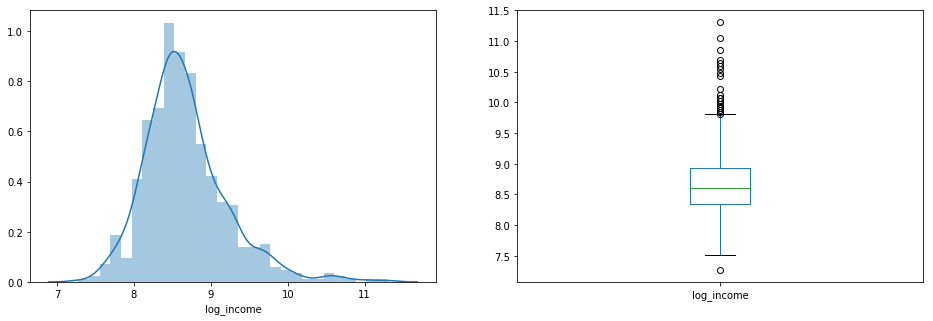

In [79]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['log_income']); 
plt.subplot(122)
train['log_income'].plot.box(figsize=(16,5)) 
plt.show()

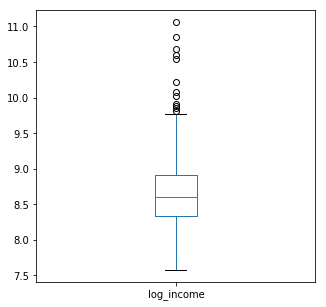

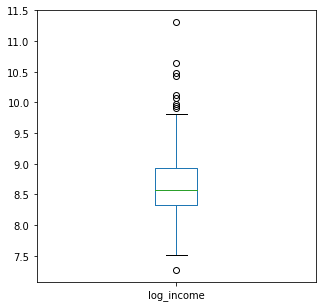

In [167]:
train[train['Loan_Status']=='Y']['log_income'].plot.box(figsize=(5,5)) 
plt.show()
train[train['Loan_Status']=='N']['log_income'].plot.box(figsize=(5,5)) 
plt.show()

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


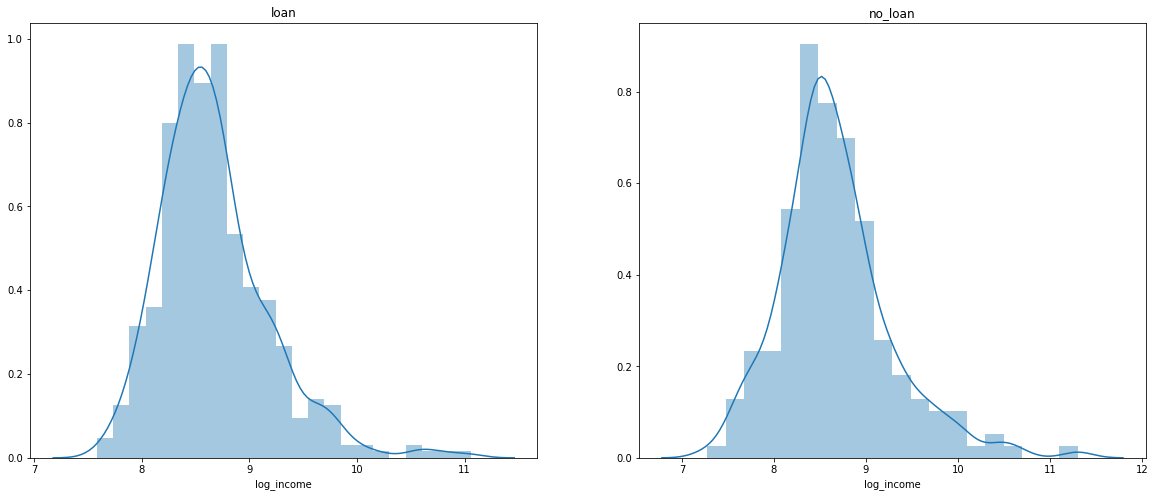

In [81]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(train[train['Loan_Status']=='Y'].log_income,ax=ax[0])
ax[0].set_title('loan')
sns.distplot(train[train['Loan_Status']=="N"].log_income,ax=ax[1])
ax[1].set_title('no_loan')
#sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
#ax[2].set_title('Fares in Pclass 3')
plt.show()

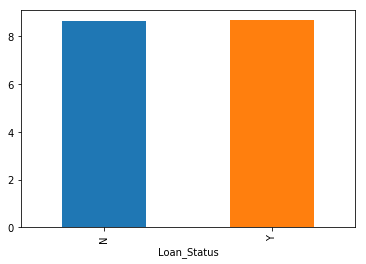

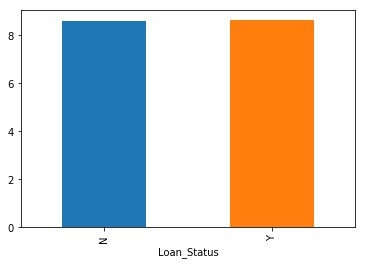

In [82]:
train.groupby('Loan_Status')['log_income'].mean().plot.bar()
plt.show()
train.groupby('Loan_Status')['log_income'].median().plot.bar()
plt.show()

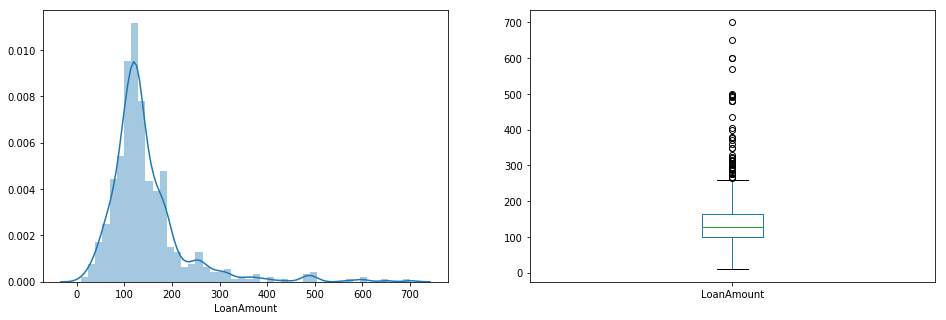

In [84]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['LoanAmount']); 
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

In [85]:
train['LoanAmount'].min()

9.0

In [96]:
train[train['LoanAmount']>164]['Loan_Status'].value_counts()

Y    99
N    55
Name: Loan_Status, dtype: int64

In [91]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [97]:
train[(train['LoanAmount']>100)&(train['LoanAmount']<164)]['Loan_Status'].value_counts()

Y    216
N     89
Name: Loan_Status, dtype: int64

In [99]:
train[train['LoanAmount']<128]['Loan_Status'].value_counts()

Y    208
N     87
Name: Loan_Status, dtype: int64

In [95]:
train['LoanAmount'].describe()

count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

In [100]:
train['logloan']=np.log(train['LoanAmount'])

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


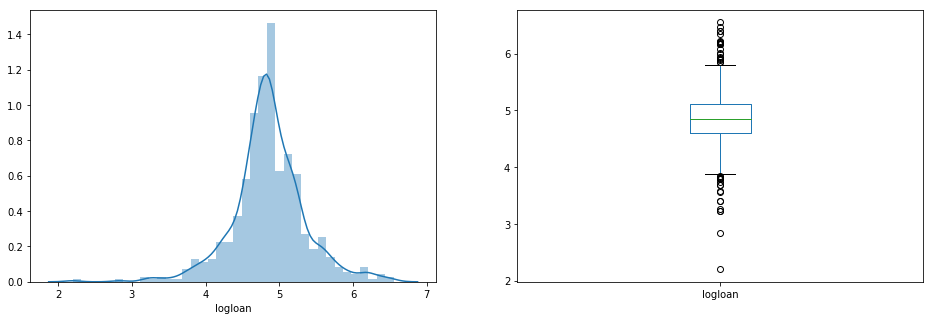

In [101]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['logloan']); 
plt.subplot(122)
train['logloan'].plot.box(figsize=(16,5)) 
plt.show()

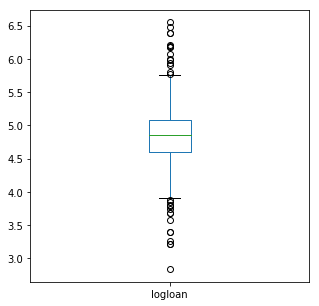

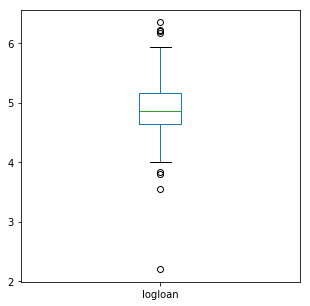

In [168]:
train[train['Loan_Status']=='Y']['logloan'].plot.box(figsize=(5,5)) 
plt.show()
train[train['Loan_Status']=='N']['logloan'].plot.box(figsize=(5,5)) 
plt.show()

In [102]:
train['logloan'].describe()

count    614.000000
mean       4.857250
std        0.495996
min        2.197225
25%        4.607658
50%        4.852030
75%        5.104426
max        6.551080
Name: logloan, dtype: float64

In [128]:
train[train['logloan']<4.1]['Loan_Status'].value_counts()

Y    31
N     6
Name: Loan_Status, dtype: int64

In [131]:
train[(train['logloan']>4.1)&(train['logloan']<4.5)]['Loan_Status'].value_counts()

Y    39
N    28
Name: Loan_Status, dtype: int64

In [139]:
train[(train['logloan']>4.5)&(train['logloan']<5.3)]['Loan_Status'].value_counts()

Y    303
N    127
Name: Loan_Status, dtype: int64

In [130]:
train[train['logloan']>5.3]['Loan_Status'].value_counts()

Y    49
N    31
Name: Loan_Status, dtype: int64

In [142]:
bins=[0,4.11,4.51,5.31,7] 
group=['low','Average','High','veryHigh'] 
train['Logloan_bin']=pd.cut(train['logloan'],bins,labels=group)

In [144]:
train['Logloan_bin'].value_counts()

High        432
veryHigh     78
Average      67
low          37
Name: Logloan_bin, dtype: int64

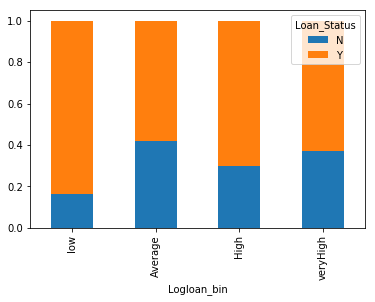

In [145]:
Logloan_bin=pd.crosstab(train['Logloan_bin'],train['Loan_Status'])
Logloan_bin.div(Logloan_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)


In [146]:
test['logloan']=np.log(test['LoanAmount'])
bins=[0,4.11,4.51,5.31,7] 
group=['low','Average','High','veryHigh'] 
test['Logloan_bin']=pd.cut(test['logloan'],bins,labels=group)

In [147]:
test.shape

(367, 16)

In [148]:
train.shape

(614, 20)

In [149]:
test.columns

Index(['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'LoanTerm',
       'logloan', 'Logloan_bin'],
      dtype='object')

In [151]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'timePeriod', 'timeperiod', 'LoanTerm', 'Total_Income', 'log_income',
       'logloan', 'Logloan_bin'],
      dtype='object')

In [154]:
train.drop(['timeperiod','timePeriod'],axis=1,inplace=True)

In [156]:
test=test.iloc[:,1:]

In [157]:
test.shape , train.shape

((367, 15), (614, 18))

In [160]:
train.drop('Loan_Amount_Term',axis=1,inplace=True)

In [161]:
test.drop('Loan_Amount_Term',axis=1,inplace=True)

### net income feature

In [169]:
trainx=pd.read_csv('train.csv')

In [170]:
testx=pd.read_csv('test_original.csv')

In [171]:
train['Loan_Amount_Term']=trainx['Loan_Amount_Term']
test['Loan_Amount_Term']=testx['Loan_Amount_Term']

In [178]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)


test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)



In [179]:
# emi
train['emi']=train['LoanAmount']/train['Loan_Amount_Term']

In [180]:
train['net_income']=train['Total_Income']-train['emi']

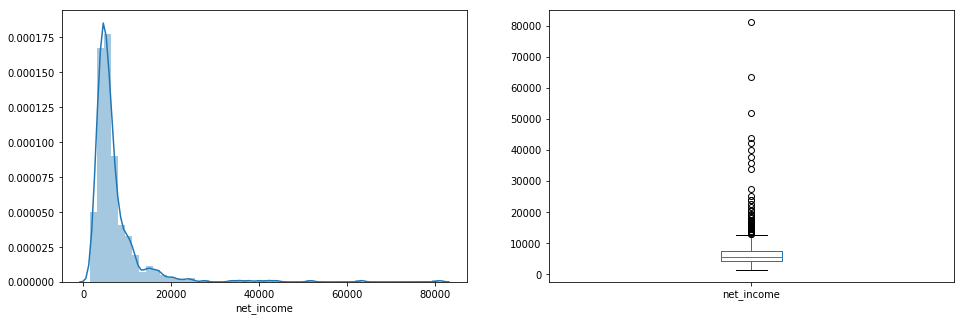

In [181]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['net_income']); 
plt.subplot(122)
train['net_income'].plot.box(figsize=(16,5)) 
plt.show()

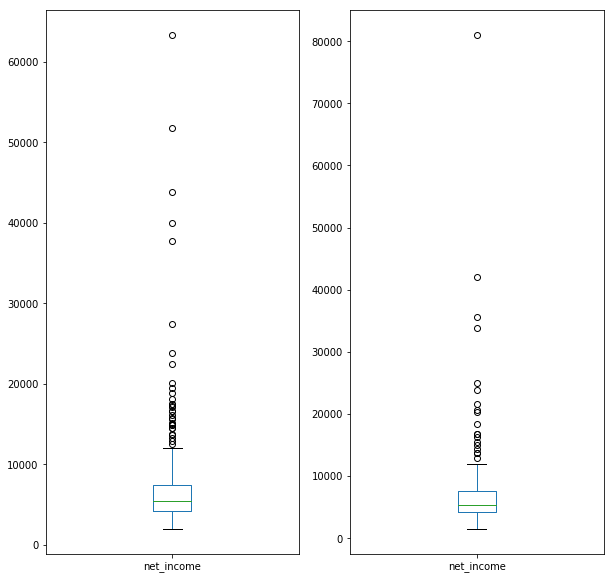

In [186]:
plt.figure(1) 
plt.subplot(121) 
train[train['Loan_Status']=='Y']['net_income'].plot.box(figsize=(10,10)) 
plt.subplot(122)
train[train['Loan_Status']=='N']['net_income'].plot.box(figsize=(10,10)) 
plt.show()

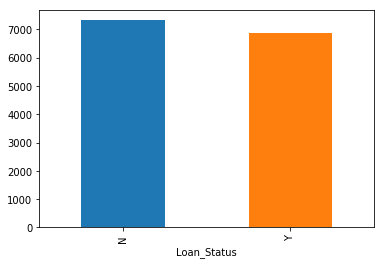

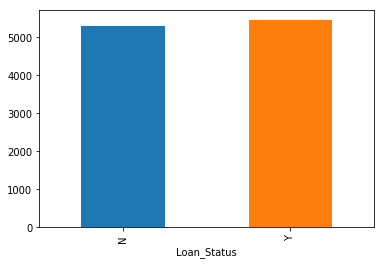

In [187]:
train.groupby('Loan_Status')['net_income'].mean().plot.bar()
plt.show()
train.groupby('Loan_Status')['net_income'].median().plot.bar()
plt.show()

In [189]:
train['log-netincome']=np.log(train['net_income'])

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


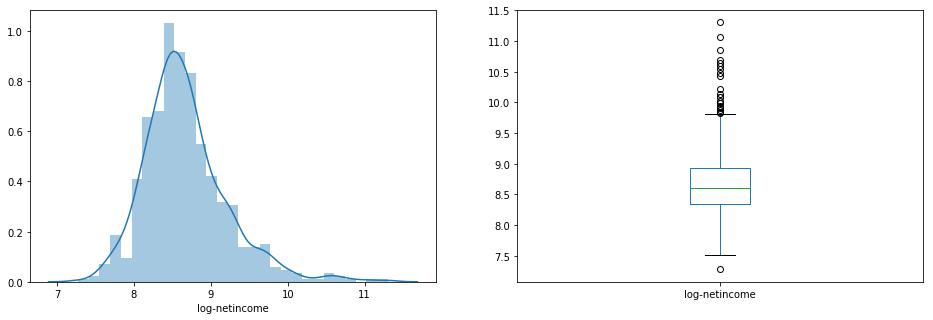

In [190]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['log-netincome']); 
plt.subplot(122)
train['log-netincome'].plot.box(figsize=(16,5)) 
plt.show()

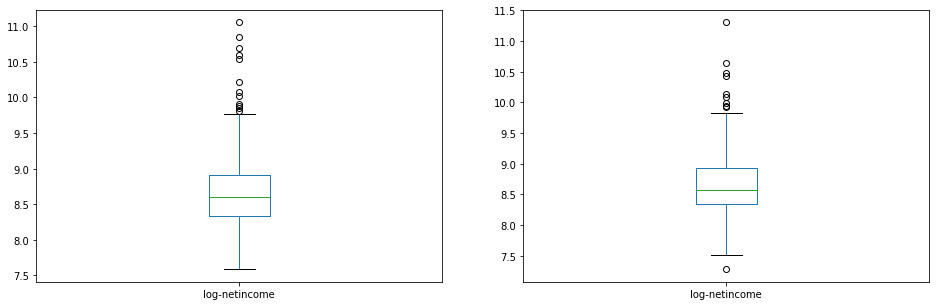

In [193]:
plt.figure(1) 
plt.subplot(121) 
train[train['Loan_Status']=='Y']['log-netincome'].plot.box(figsize=(16,5)) 
plt.subplot(122)
train[train['Loan_Status']=='N']['log-netincome'].plot.box(figsize=(16,5)) 
plt.show()

In [194]:
train['log-netincome'].describe()

count    614.000000
mean       8.669336
std        0.545115
min        7.273719
25%        8.334655
50%        8.597134
75%        8.925185
max       11.302192
Name: log-netincome, dtype: float64

In [226]:
train[(train['log-netincome']>8.2)&(train['log-netincome']<9.3)]['Loan_Status'].value_counts()

Y    317
N    126
Name: Loan_Status, dtype: int64

In [225]:
train[(train['log-netincome']>9.3)]['Loan_Status'].value_counts()

Y    41
N    23
Name: Loan_Status, dtype: int64

In [227]:
bins=[0,8.2,9.3,12] 
group=['low','Average','High'] 
train['netincomelogbin']=pd.cut(train['log-netincome'],bins,labels=group)

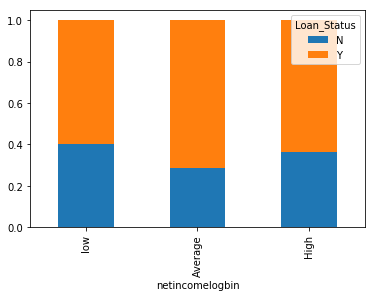

In [230]:
netincomelogbin=pd.crosstab(train['netincomelogbin'],train['Loan_Status'])
netincomelogbin.div(netincomelogbin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)


In [234]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Credit_History', 'Property_Area', 'Loan_Status', 'LoanTerm',
       'Total_Income', 'log_income', 'logloan', 'Logloan_bin',
       'Loan_Amount_Term', 'emi', 'net_income', 'log-netincome',
       'netincomelogbin'],
      dtype='object')

In [236]:
# emi
test['Total_income']=test['ApplicantIncome']+ test['CoapplicantIncome']
test['emi']=test['LoanAmount']/test['Loan_Amount_Term']
test['net_income']=test['Total_income']-test['emi']

In [237]:
test['log-netincome']=np.log(test['net_income'])
bins=[0,8.2,9.3,12] 
group=['low','Average','High'] 
test['netincomelogbin']=pd.cut(test['log-netincome'],bins,labels=group)

In [238]:
test.shape

(367, 20)

In [239]:
train.shape

(614, 22)

In [240]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Credit_History', 'Property_Area', 'Loan_Status', 'LoanTerm',
       'Total_Income', 'log_income', 'logloan', 'Logloan_bin',
       'Loan_Amount_Term', 'emi', 'net_income', 'log-netincome',
       'netincomelogbin'],
      dtype='object')

In [241]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Credit_History', 'Property_Area', 'LoanTerm', 'logloan', 'Logloan_bin',
       'Loan_Amount_Term', 'emi', 'Total_income', 'net_income',
       'log-netincome', 'netincomelogbin'],
      dtype='object')

In [242]:
train.drop('log_income',axis=1,inplace=True)

In [250]:
columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','logloan','Loan_Amount_Term','emi','Total_Income','net_income','log-netincome']

In [244]:
train_features=train.copy() 
test_features=test.copy()

In [247]:
train.drop(columns,axis=1,inplace=True)

In [249]:
columns1=['ApplicantIncome','CoapplicantIncome','LoanAmount','logloan','Loan_Amount_Term','emi','Total_income','net_income','log-netincome']

In [251]:
test.drop(columns1,axis=1,inplace=True)

In [253]:
train.shape , test.shape

((614, 12), (367, 11))

In [254]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanTerm,Logloan_bin,netincomelogbin
0,LP001015,Male,Yes,0,Graduate,No,1,Urban,med,High,Average
1,LP001022,Male,Yes,1,Graduate,No,1,Urban,med,High,Average
2,LP001031,Male,Yes,2,Graduate,No,1,Urban,med,veryHigh,Average
3,LP001035,Male,Yes,2,Graduate,No,Unknown,Urban,med,High,Average
4,LP001051,Male,No,0,Not Graduate,No,1,Urban,med,Average,low


In [256]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [257]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [258]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [259]:
X.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,...,LoanTerm_high,LoanTerm_low,LoanTerm_med,Logloan_bin_low,Logloan_bin_Average,Logloan_bin_High,Logloan_bin_veryHigh,netincomelogbin_low,netincomelogbin_Average,netincomelogbin_High
0,0,1,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1,0,1,0,1,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,0,1,0,1,0,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
3,0,1,0,1,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
4,0,1,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [260]:
X.shape

(614, 28)

In [261]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [262]:
from sklearn.model_selection import GridSearchCV

In [263]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.0001,0.001,0.01,0.1,1,10.0,100.0,1000.0]

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [265]:
logistic = LogisticRegression() 

In [266]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, n_jobs=-1)

In [267]:
best_model = clf.fit(X, y)

D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [268]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])


Best Penalty: l2
Best C: 0.1


In [269]:
print(best_model.best_score_)

0.8110749185667753


In [270]:
#prediction using best estimators
model1=best_model.best_estimator_
model1.fit(X,y)
pred_test = model1.predict(test)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [274]:
submissionFeature=pd.read_csv("Sample_Submission.csv")
submissionFeature['Loan_Status']=pred_test 
submissionFeature['Loan_ID']=testx['Loan_ID']
submissionFeature['Loan_Status'].replace(0, 'N',inplace=True) 
submissionFeature['Loan_Status'].replace(1, 'Y',inplace=True)
submissionFeature.to_csv('featurelogistic.csv',index=False)